In [27]:
%matplotlib inline

# Analysis for 3 month data

In [28]:
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../database')
sys.path.insert(0, '../data_exploration')
from database import mongo_client
import data_exploration as de

In [29]:
client = mongo_client.CERNMongoClient(logging=False)
all_collections = client.get_all_collections()
print("Found " + str(len(all_collections)) + " collections:")
print(all_collections)

Found 132 collections:
[u'MKI.UA23.IPOC.CB1:T_LENGTH', u'MKI.UA87.STATE:MODE', u'MKI.A5R8.B2:TEMP_TUBE_UP', u'MKI.UA23.IPOC.AB1:T_LENGTH', u'MKI.UA87.IPOC.BB2:I_STRENGTH', u'MKI.UA87.STATE:SOFTSTARTSTATE', u'MKI.B5R8.B2:PRESSURE_INT', u'MKI.D5R8.B2:TEMP_MAGNET_UP', u'MKI.UA87.F3.CONTROLLER:KICK_COUNT_TOPLAY', u'MKI.A5R8.B2:PRESSURE', u'MKI.D5R8.B2:TEMP_TUBE_DOWN', u'MKI.D5L2.B1:TEMP_TUBE_UP', u'MKI.UA87.IPOC.DB2:E_KICK', u'MKI.UA87.IPOC.CB2:T_START_TH', u'MKI.C5L2.B1:TEMP_TUBE_UP', u'MKI.A5L2.B1:TEMP_MAGNET_UP', u'MKI.UA23.IPOC.AB1:E_KICK', u'MKI.C5R8.B2:TEMP_MAGNET_UP', u'MKI.B5R8.B2:TEMP_MAGNET_DOWN', u'MKI.UA23.IPOC.DB1:E_KICK', u'MKI.B5R8.B2:PRESSURE', u'MKI.UA23.IPOC.AB1:T_FALLTIME', u'MKI.UA87.F3.CONTROLLER:KICK_DELAY_TOPLAY', u'MKI.UA87.F3.CONTROLLER:KICK_ENABLE_TOPLAY', u'LHC.BCTFR.A6R4.B2:BEAM_INTENSITY', u'MKI.UA23.IPOC.TMR-BB1.Waveform#waveformData', u'MKI.UA23.IPOC.DB1:T_FALLTIME', u'MKI.D5L2.B1:PRESSURE', u'MKI.D5L2.B1:TEMP_MAGNET_UP', u'MKI.UA23.IPOC.TMR-AB1.Waveform#wave

## Normal Measurements

### PRESSURE

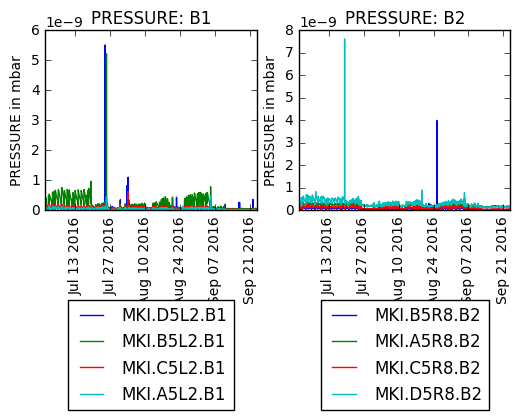

In [30]:
df = client.get_measurements_pattern("^.*PRESSURE")
df = client.compress_measurements(df)
plot = de.plot_B1_B2(df, "PRESSURE", "mbar")
plt.show()

### PRESSURE_INT
problem: too much data

### TEMP_MAGNET_DOWN

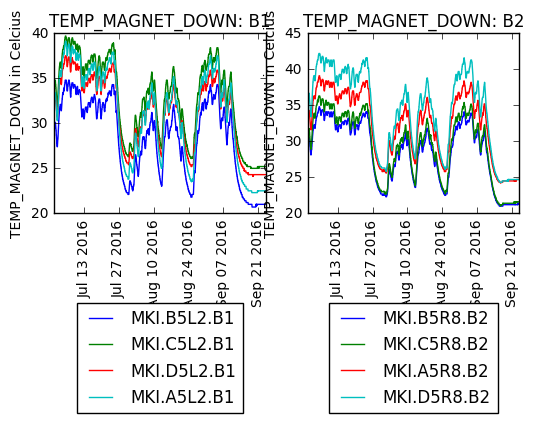

In [31]:
df = client.get_measurements_pattern("^.*TEMP_MAGNET_DOWN")
df = client.compress_measurements(df)
plot = de.plot_B1_B2(df, "TEMP_MAGNET_DOWN", "Celcius")
plt.show()

### TEMP_MAGNET_UP

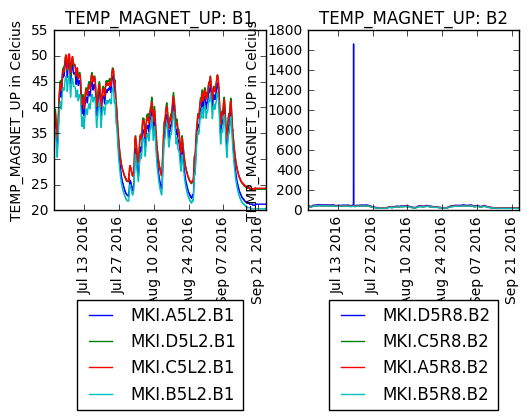

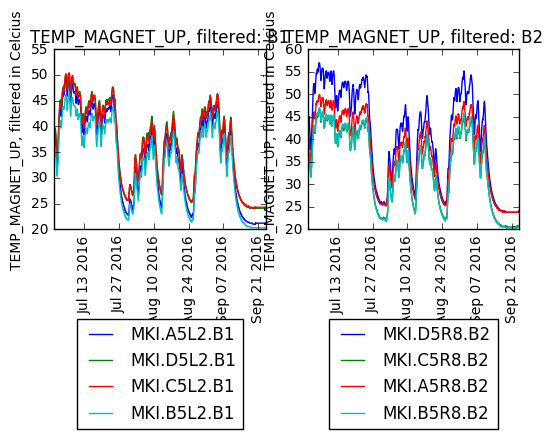

In [32]:
data = client.get_measurements_pattern("^.*TEMP_MAGNET_UP")
df = client.compress_measurements(data)
plot = de.plot_B1_B2(df, "TEMP_MAGNET_UP", "Celcius")
plt.show()
dff = client.filter_extremes(data, 200)
dff = client.compress_measurements(dff)
plot = de.plot_B1_B2(dff, "TEMP_MAGNET_UP, filtered", "Celcius")
plt.show()

Single spike with value 1600 around 20 Juli in D5R8 filtered out

### TEMP_TUBE_DOWN

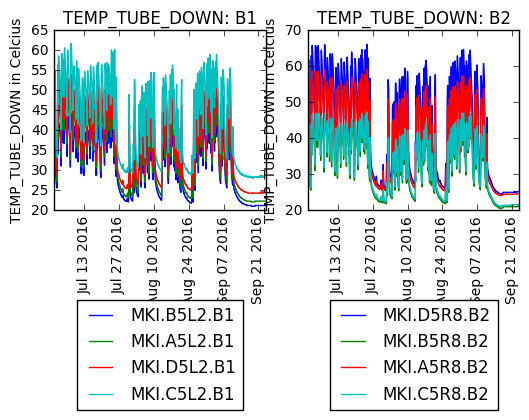

In [33]:
data = client.get_measurements_pattern("^.*TEMP_TUBE_DOWN")
df = client.compress_measurements(data)
plot = de.plot_B1_B2(df, "TEMP_TUBE_DOWN", "Celcius")
plt.show()

### TEMP_TUBE_UP

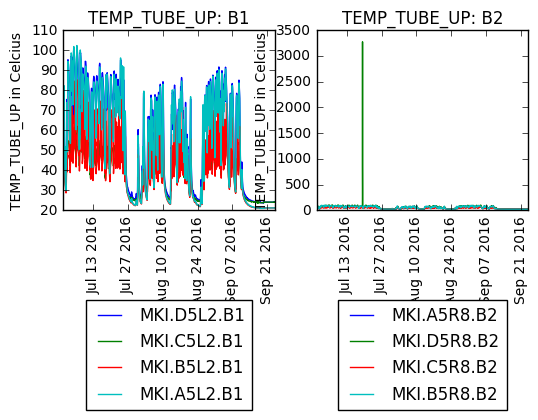

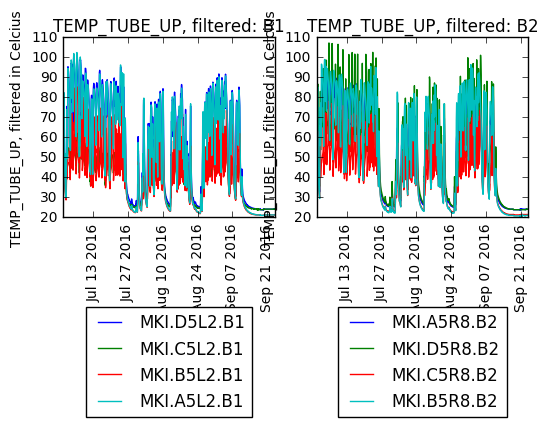

In [34]:
data = client.get_measurements_pattern("^.*TEMP_TUBE_UP")
df = client.compress_measurements(data)
plot = de.plot_B1_B2(df, "TEMP_TUBE_UP", "Celcius")
plt.show()
dff = client.filter_extremes(data, 200)
dff = client.compress_measurements(dff)
plot = de.plot_B1_B2(dff, "TEMP_TUBE_UP, filtered", "Celcius")
plt.show()

Same Spike as TEMP_MAGNET_UP

## IPOC

### E_KICK

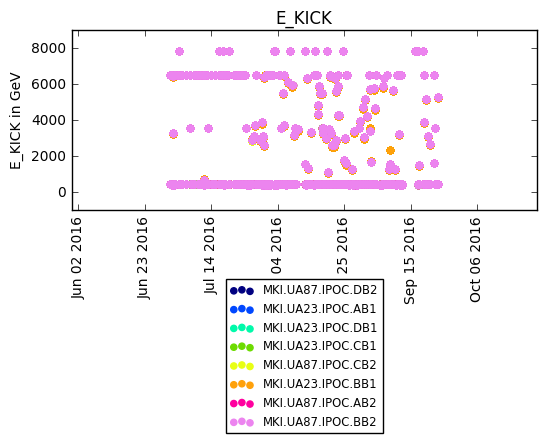

In [35]:
data = client.get_measurements_pattern("^.*E_KICK")
plot = de.plot_IPOC(data, "E_KICK", "GeV")
plt.show()

### T_DELAY

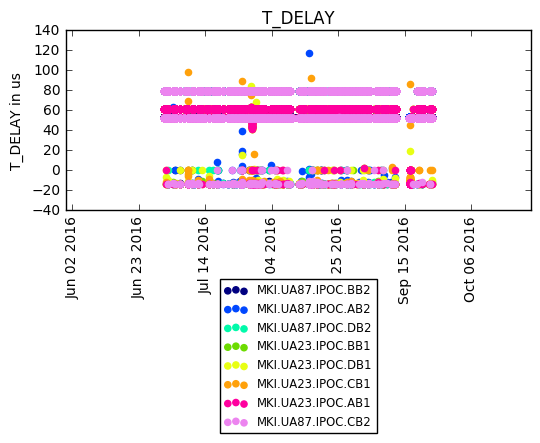

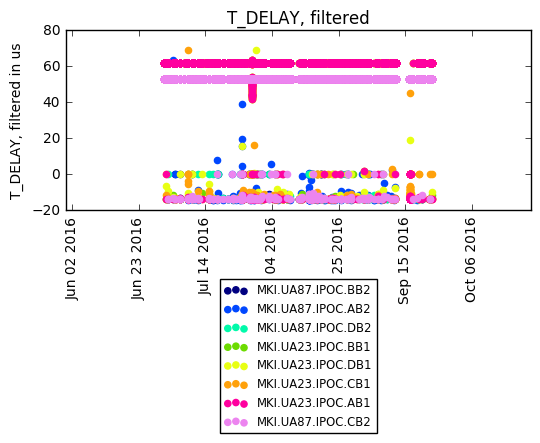

In [36]:
data = client.get_measurements_pattern("^.*T_DELAY")
plot = de.plot_IPOC(data, "T_DELAY", "us")
plt.show()
d2 = client.filter_extremes(data, 75)
plot = de.plot_IPOC(d2, "T_DELAY, filtered", "us")
plt.show()

### T_FALLTIME

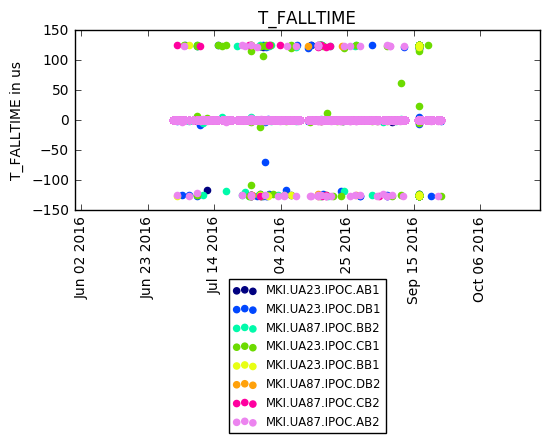

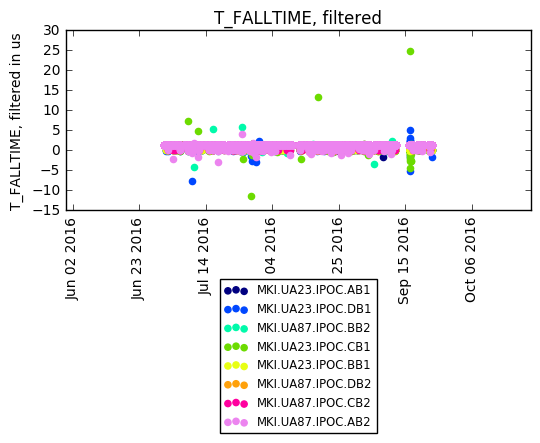

In [37]:
data = client.get_measurements_pattern("^.*T_FALLTIME")
plot = de.plot_IPOC(data, "T_FALLTIME", "us")
plt.show()
d2 = client.filter_extremes(data, 60)
plot = de.plot_IPOC(d2, "T_FALLTIME, filtered", "us")
plt.show()

### T_LENGTH

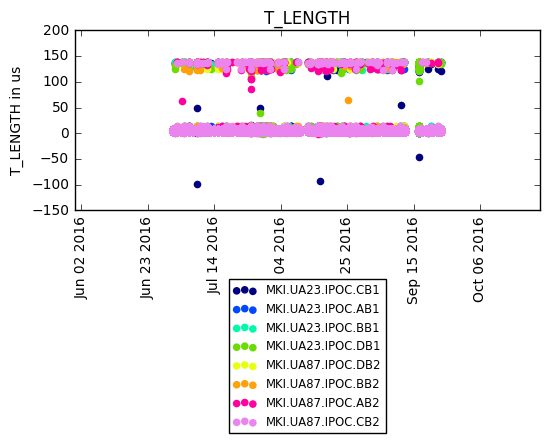

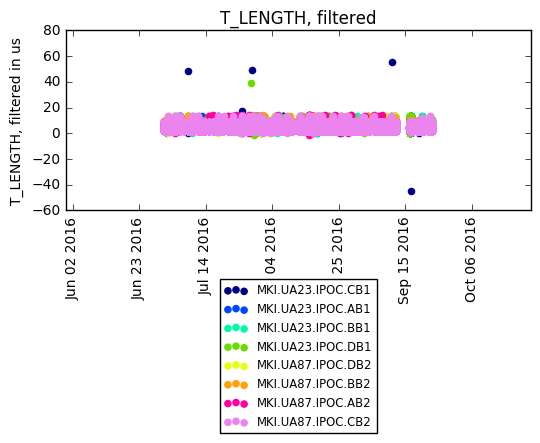

In [38]:
data = client.get_measurements_pattern("^.*T_LENGTH")
plot = de.plot_IPOC(data, "T_LENGTH", "us")
plt.show()
d2 = client.filter_extremes(data, 60)
plot = de.plot_IPOC(d2, "T_LENGTH, filtered", "us")
plt.show()

Note: again false measurements around 150 us

### T_RISETIME

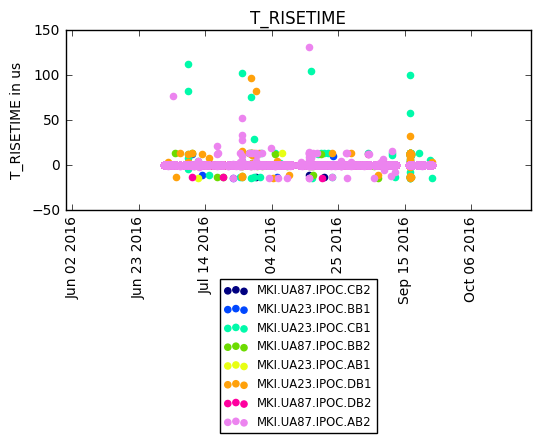

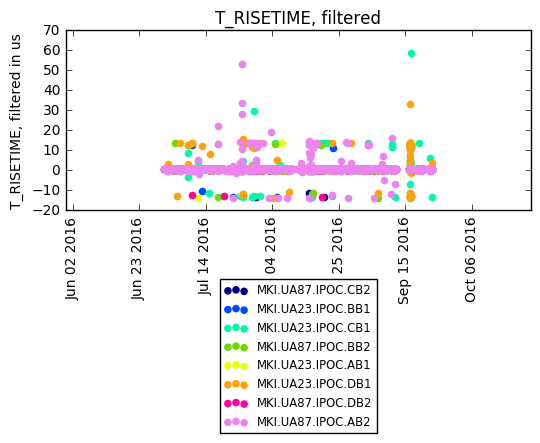

In [39]:
data = client.get_measurements_pattern("^.*T_RISETIME")
plot = de.plot_IPOC(data, "T_RISETIME", "us")
plt.show()
d2 = client.filter_extremes(data, 60)
plot = de.plot_IPOC(d2, "T_RISETIME, filtered", "us")
plt.show()

### T_START_TH

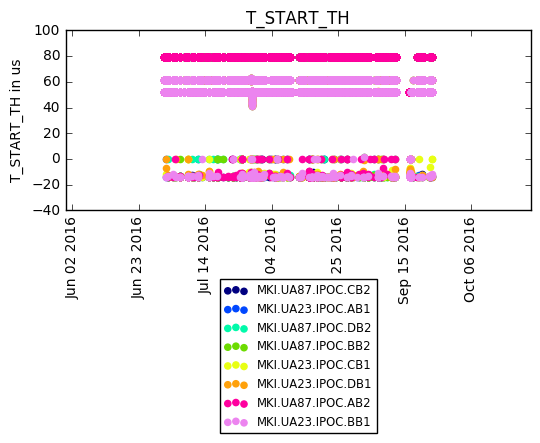

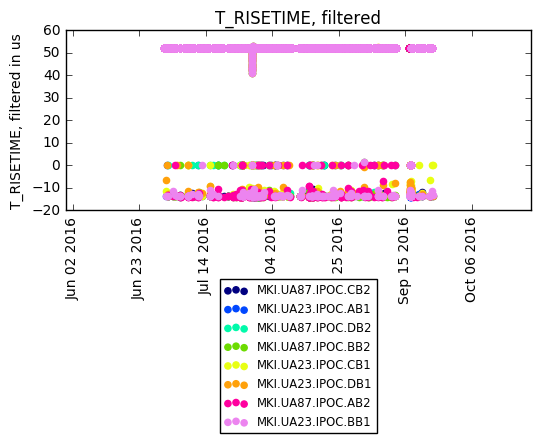

In [40]:
data = client.get_measurements_pattern("^.*T_START_TH")
plot = de.plot_IPOC(data, "T_START_TH", "us")
plt.show()
d2 = client.filter_extremes(data, 60)
plot = de.plot_IPOC(d2, "T_RISETIME, filtered", "us")
plt.show()